In [143]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import numpy as np
#reading in csv into pandas dataframe
df = pd.read_csv('kidney_disease.csv')

In [144]:
#renaming columns to understand what the columns stand for
df = df.rename(columns={'id':'Id','age':'Age', 'bp':"Blood_Pressure", 'sg':'Specific_Gravity', 
                   'al':'Albumin', 'su':'Sugar', 'rbc':'Red_Blood_Cells', 'pc':'Pus_Cell', 
                   'pcc':'Pus_Cell_Clumps', 'ba':'Bacteria', 'bgr':'Blood_Glucose_Random',
                   'bu':'Blood_Urea', 'sc':'Serum_Creatine', 'sod':'Sodium', 'pot':'Potassium',
                   'hemo':'Hemoglobin', 'pcv':'Packed_Cell_Volume', 'wc':'White_Blood_Cell_Count',
                   'rc':'Red_Blood_Cell_Count', 'htn':'Hypertension', 'dm':'Diabetes_Mellitus',
                   'cad':'Coronary_Artery_Disease', 'appet':'Appetite', 'pe':'Pedal_Edema',
                   'ane':'Anemia', 'classification':'Classif'})

In [145]:
#looking at how much information are we missing
print('Missing Entries')
print(df.isnull().sum())

Missing Entries
Id                           0
Age                          9
Blood_Pressure              12
Specific_Gravity            47
Albumin                     46
Sugar                       49
Red_Blood_Cells            152
Pus_Cell                    65
Pus_Cell_Clumps              4
Bacteria                     4
Blood_Glucose_Random        44
Blood_Urea                  19
Serum_Creatine              17
Sodium                      87
Potassium                   88
Hemoglobin                  52
Packed_Cell_Volume          70
White_Blood_Cell_Count     105
Red_Blood_Cell_Count       130
Hypertension                 2
Diabetes_Mellitus            2
Coronary_Artery_Disease      2
Appetite                     1
Pedal_Edema                  1
Anemia                       1
Classif                      0
dtype: int64


In [146]:
#looking at the column datatypes
df.dtypes

Id                           int64
Age                        float64
Blood_Pressure             float64
Specific_Gravity           float64
Albumin                    float64
Sugar                      float64
Red_Blood_Cells             object
Pus_Cell                    object
Pus_Cell_Clumps             object
Bacteria                    object
Blood_Glucose_Random       float64
Blood_Urea                 float64
Serum_Creatine             float64
Sodium                     float64
Potassium                  float64
Hemoglobin                 float64
Packed_Cell_Volume          object
White_Blood_Cell_Count      object
Red_Blood_Cell_Count        object
Hypertension                object
Diabetes_Mellitus           object
Coronary_Artery_Disease     object
Appetite                    object
Pedal_Edema                 object
Anemia                      object
Classif                     object
dtype: object

In [147]:
print(df['Classif'].unique())
print(df['Diabetes_Mellitus'].unique())
print(df['Coronary_Artery_Disease'].unique())

['ckd' 'ckd\t' 'notckd']
['yes' 'no' ' yes' '\tno' '\tyes' nan]
['no' 'yes' '\tno' nan]



What is ckd\t? It seems like it picked up \tab so we will get rid of that and plot our correlation. It looks like the dataset values have some other \t problems so we will go ahead and remove those values and replace them as well.

In [148]:
df['Classif'] = df['Classif'].replace(to_replace ='ckd\t', value ='ckd') 
df['Diabetes_Mellitus'] = df['Diabetes_Mellitus'].replace(to_replace ='\tno', value ='no') 
df['Diabetes_Mellitus'] = df['Diabetes_Mellitus'].replace(to_replace ='\tyes', value ='yes') 
df['Diabetes_Mellitus'] = df['Diabetes_Mellitus'].replace(to_replace =' yes', value ='yes') 
df['Coronary_Artery_Disease'] = df['Coronary_Artery_Disease'].replace(to_replace ='\tno', value='no')

Now that we have gotten rid of the odd values we will start dealing with missing values.

In [149]:
#checking to see if we will have missing values
print('Missing Entries')
print(df.isnull().sum())

Missing Entries
Id                           0
Age                          9
Blood_Pressure              12
Specific_Gravity            47
Albumin                     46
Sugar                       49
Red_Blood_Cells            152
Pus_Cell                    65
Pus_Cell_Clumps              4
Bacteria                     4
Blood_Glucose_Random        44
Blood_Urea                  19
Serum_Creatine              17
Sodium                      87
Potassium                   88
Hemoglobin                  52
Packed_Cell_Volume          70
White_Blood_Cell_Count     105
Red_Blood_Cell_Count       130
Hypertension                 2
Diabetes_Mellitus            2
Coronary_Artery_Disease      2
Appetite                     1
Pedal_Edema                  1
Anemia                       1
Classif                      0
dtype: int64


We have at most 1/3 of the dataset missing entries. Since our dataset only has 400 rows, removing them would not be a good idea, therefore we will replace the missing values with the columns mean-average. 

However since not every column is an int or float, so we change the columns that are numbers into floats and replace NaN with the mean

We will take care of all the missing float/int NaN values by replacing them with the mean. However those columns that are not float/ints will need to be taken care of as well. Since we cannot replace them with the mean or the most frequent value (replacing with most frequent value would skew the data and for training when and if we model) we will go ahead and just change every unkown to NAN and then replace every nan with the mean of that column

In [150]:
#making a list of the dataframes columns so we can iterate through them 
df_columns = list(df)

#turning object columns into float
df['Packed_Cell_Volume'] = pd.to_numeric(df['Packed_Cell_Volume'],errors='coerce')
df['White_Blood_Cell_Count'] = pd.to_numeric(df['White_Blood_Cell_Count'],errors='coerce')
df['Red_Blood_Cell_Count'] = pd.to_numeric(df['Red_Blood_Cell_Count'],errors='coerce')

In [151]:
#replacing all the word values with integers
df = df.replace({'yes':1, 'normal':1, 'present':1, 'good':1, 
               'ckd':1, 'no':0, 'abnormal':0, 'notpresent':0,
               'poor':0, 'notckd':0, 'Unknown':float('Nan')})

In [152]:
#iterating through all the columns that are objects and chaning the datatype of the column to float then filling in all na with the columns mean value
for column in df_columns:
    if(df[column].dtype == 'object'):
        df[column] = pd.to_numeric(df[column], downcast="float")
    
    df[column] = df[column].fillna(df[column].mean())

In [153]:
#checking to see if we still have missing values
print('Missing Entries')
print(df.isnull().sum())

Missing Entries
Id                         0
Age                        0
Blood_Pressure             0
Specific_Gravity           0
Albumin                    0
Sugar                      0
Red_Blood_Cells            0
Pus_Cell                   0
Pus_Cell_Clumps            0
Bacteria                   0
Blood_Glucose_Random       0
Blood_Urea                 0
Serum_Creatine             0
Sodium                     0
Potassium                  0
Hemoglobin                 0
Packed_Cell_Volume         0
White_Blood_Cell_Count     0
Red_Blood_Cell_Count       0
Hypertension               0
Diabetes_Mellitus          0
Coronary_Artery_Disease    0
Appetite                   0
Pedal_Edema                0
Anemia                     0
Classif                    0
dtype: int64


Now that we no longer have any missing values. Our data is ready for data analysis and correlation analysis.

In [154]:
print('Means:')
for col in df.columns:
    if df[col].dtype=='float64':
        print(col,df[col].mean(axis = 0))


Means:
Age 51.4833759590793
Blood_Pressure 76.46907216494844
Specific_Gravity 1.017407932011323
Albumin 1.0169491525423737
Sugar 0.45014245014244947
Red_Blood_Cells 0.8104838709677424
Pus_Cell 0.7731343283582085
Pus_Cell_Clumps 0.10606060606060609
Bacteria 0.05555555555555557
Blood_Glucose_Random 148.03651685393265
Blood_Urea 57.42572178477692
Serum_Creatine 3.072454308093993
Sodium 137.5287539936103
Potassium 4.627243589743589
Hemoglobin 12.526436781609211
Packed_Cell_Volume 38.884498480243195
White_Blood_Cell_Count 8406.122448979597
Red_Blood_Cell_Count 4.707434944237918
Hypertension 0.36934673366834175
Diabetes_Mellitus 0.34422110552763824
Coronary_Artery_Disease 0.08542713567839197
Appetite 0.7944862155388472
Pedal_Edema 0.19047619047619047
Anemia 0.15037593984962405


In [155]:
print('Standard Distributions:')
for col in df.columns:
    if df[col].dtype=='float64':
        print(col,df[col].std(axis = 0))


Standard Distributions:
Age 16.974966231357403
Blood_Pressure 13.47629766150935
Specific_Gravity 0.005369377992466673
Albumin 1.2723178630253107
Sugar 1.0294869307305943
Red_Blood_Cells 0.30898305967581297
Pus_Cell 0.3837495037026624
Pus_Cell_Clumps 0.3067554132734533
Bacteria 0.22819866568847202
Blood_Glucose_Random 74.78263447653055
Blood_Urea 49.28588709237643
Serum_Creatine 5.6174901175192975
Sodium 9.204273445486722
Potassium 2.8197826172844973
Hemoglobin 2.7161711873186554
Packed_Cell_Volume 8.151081380700974
White_Blood_Cell_Count 2523.2199758633974
Red_Blood_Cell_Count 0.8403143136011177
Hypertension 0.48202275903473074
Diabetes_Mellitus 0.47451784932719954
Coronary_Artery_Disease 0.27916577026123945
Appetite 0.40407656311348866
Pedal_Edema 0.39267672624930006
Anemia 0.3574395285414937


In [156]:
newdf = df
newdf = df[['Hemoglobin', 'Potassium', 'Red_Blood_Cell_Count', 
            'Serum_Creatine', 'Sodium', 'Specific_Gravity', 'Sugar',
            'White_Blood_Cell_Count']]

In [157]:
#iterating through all the columns that are object and then printing out the unique values
for column in df_columns:
    if(df[column].dtype == 'object'):
        print(column,df[column].unique())

In [158]:
for data in newdf:
    for moredata in newdf:
        print("Correlation between {} and {} is".format(data, moredata), stats.pearsonr(df[moredata],df[data]))

Correlation between Hemoglobin and Hemoglobin is (1.0, 0.0)
Correlation between Hemoglobin and Potassium is (-0.1006055522347049, 0.0443340474288429)
Correlation between Hemoglobin and Red_Blood_Cell_Count is (0.6822567780772888, 4.288324283083802e-56)
Correlation between Hemoglobin and Serum_Creatine is (-0.342079244541066, 2.0144516105949646e-12)
Correlation between Hemoglobin and Sodium is (0.333614030597542, 7.458461480928423e-12)
Correlation between Hemoglobin and Specific_Gravity is (0.53175536114454, 1.4128117040181454e-30)
Correlation between Hemoglobin and Sugar is (-0.19151831441916564, 0.0001161495478011054)
Correlation between Hemoglobin and White_Blood_Cell_Count is (-0.1538177011471004, 0.0020347943257155313)
Correlation between Potassium and Hemoglobin is (-0.1006055522347049, 0.0443340474288429)
Correlation between Potassium and Potassium is (1.0, 0.0)
Correlation between Potassium and Red_Blood_Cell_Count is (-0.12045647773181353, 0.01593622762653625)
Correlation betwe

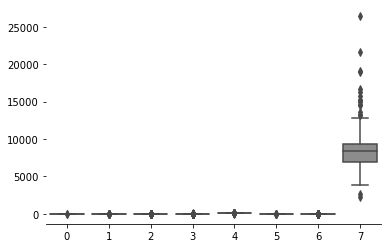

In [159]:
data = [df['Hemoglobin'], df['Potassium'], df['Red_Blood_Cell_Count'], df['Serum_Creatine'], 
        df['Sodium'], df['Specific_Gravity'], df['Sugar'], df['White_Blood_Cell_Count']]
sns.boxplot(data=data, palette="deep")
sns.despine(left=True)

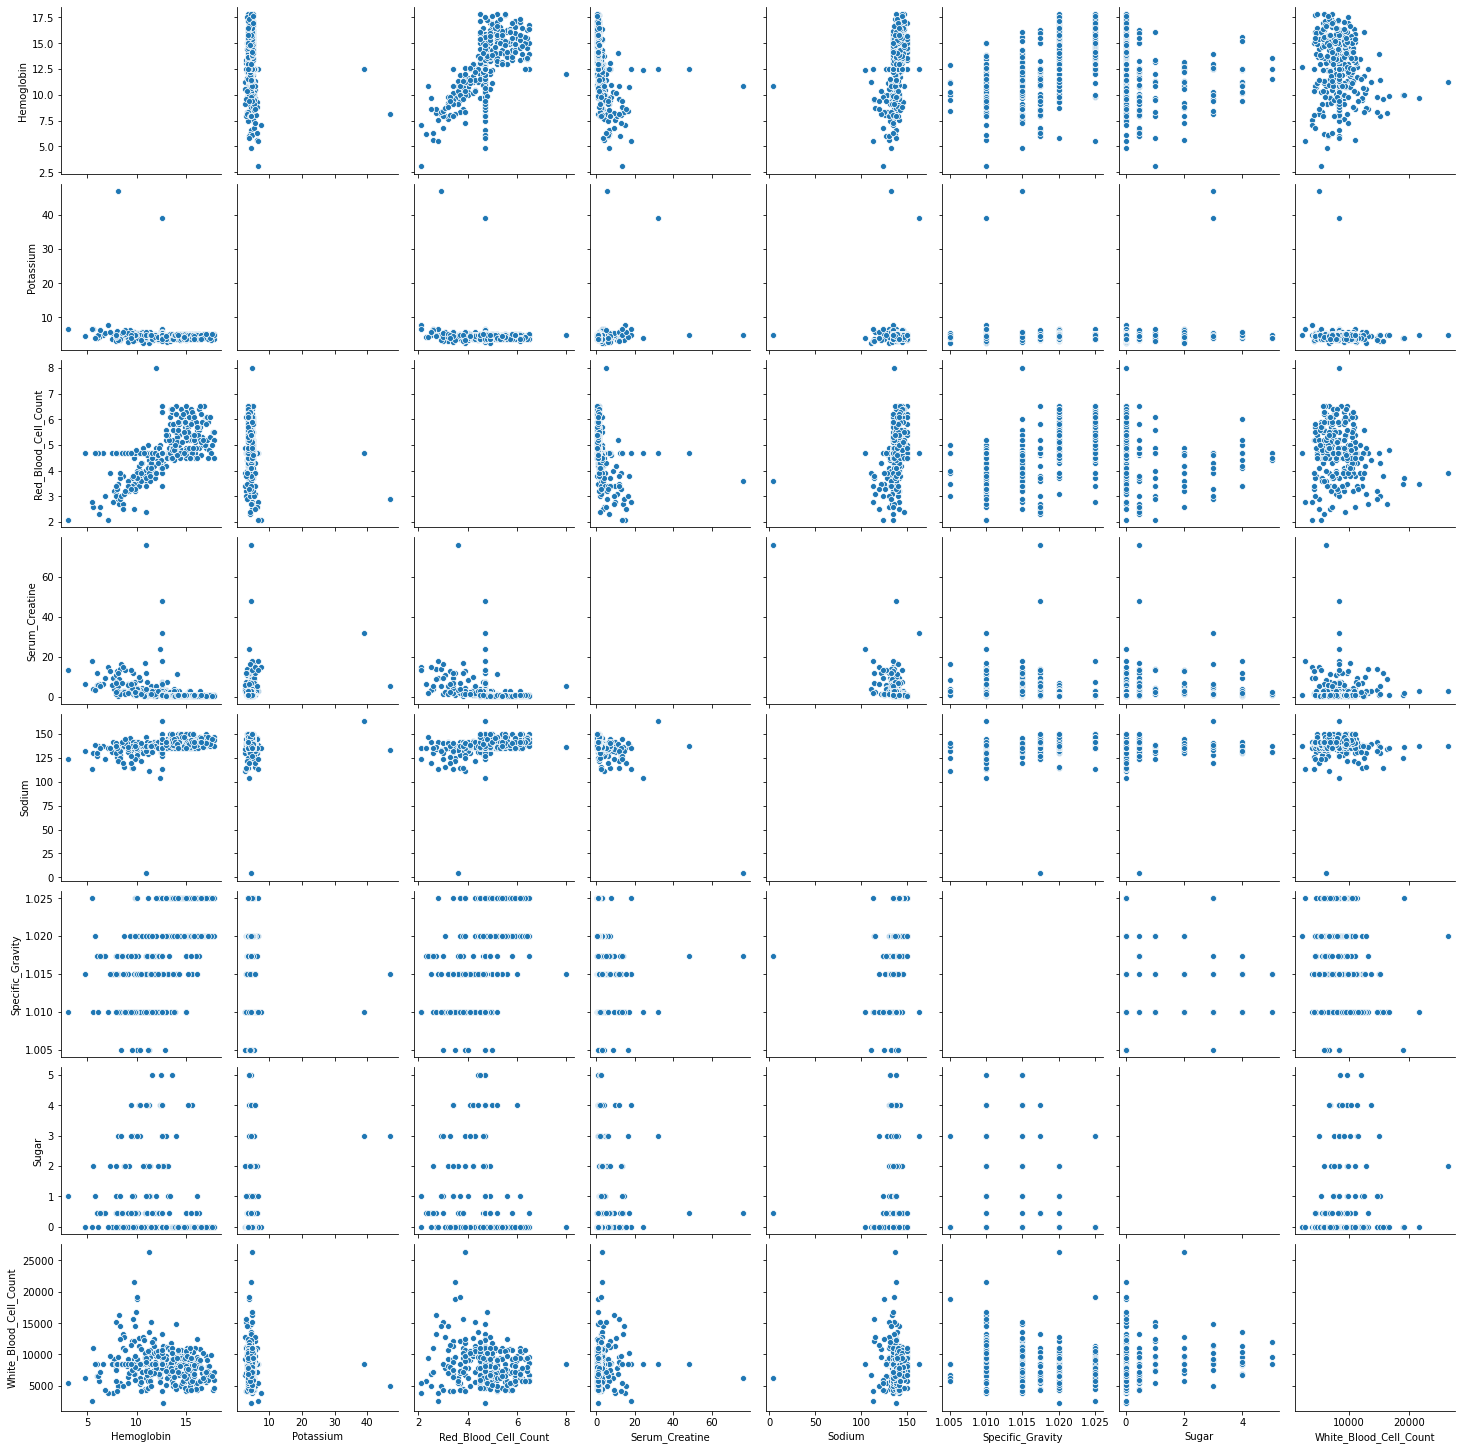

In [160]:
g = sns.PairGrid(newdf)
g.map_offdiag(sns.scatterplot)

Text(0.5, 1.0, 'Unnormalized Data')

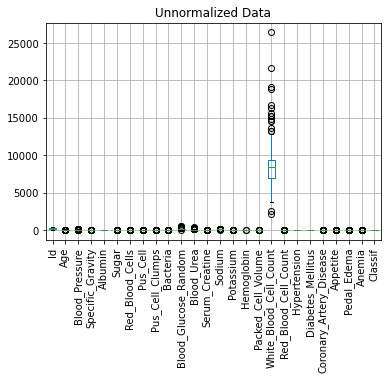

In [161]:
df.boxplot(rot=90);
plt.title("Unnormalized Data")


Text(0.5, 1.0, 'Normalized Data')

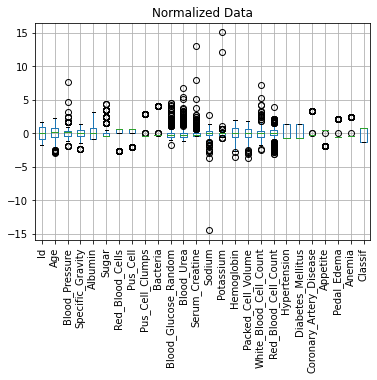

In [162]:
#Our data is normalized and completely numerical now.
def zscore(s): return (s - s.mean()) / s.std()
normData=df.apply(zscore) 
normData.boxplot(rot=90);
plt.title("Normalized Data")

[Text(0.5, 0, 'People'), Text(0.5, 1.0, 'Serum_Creatine')]

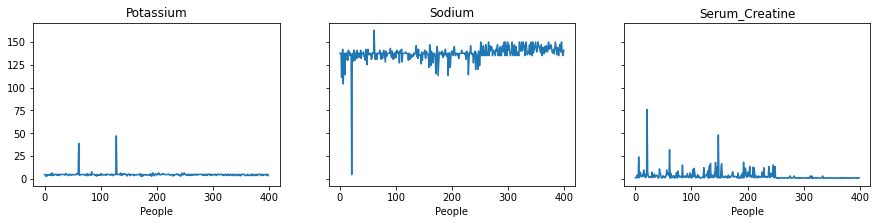

In [163]:
#We have big time outliers
#Potasium 128 and 61, Sodium 21, and Creatinine 21
#These original numbers are impossible
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(15,3), sharex=True, sharey=True)
ax1.plot(df['Potassium'])
ax2.plot(df['Sodium'])
ax3.plot(df['Serum_Creatine'])
#ax4.hist(df['Sodium'].sort_values())

ax1.set(title = "Potassium",
       xlabel = "People")
ax2.set(title = "Sodium",
       xlabel = "People")
ax3.set(title = "Serum_Creatine",
       xlabel = "People")



[Text(0.5, 0, 'People'), Text(0.5, 1.0, 'Serum_Creatine')]

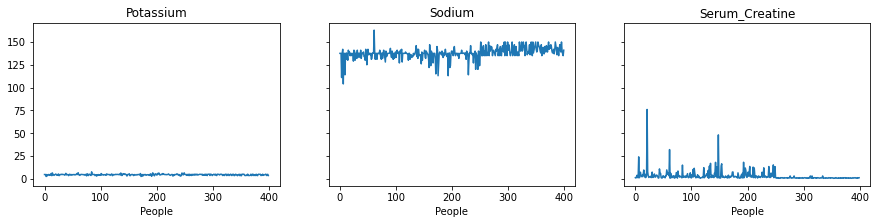

In [164]:
#replacing outliers that are impossible wiht the mean of the column
df.iloc[128, df.columns.get_loc('Potassium')] = df['Potassium'].mean()
df.iloc[61, df.columns.get_loc('Potassium')] = df['Potassium'].mean()
df.iloc[21, df.columns.get_loc('Sodium')] = df['Sodium'].mean()

# We will have to figure out what we want to do with.

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(15,3), sharex=True, sharey=True)
ax1.plot(df['Potassium'])
ax2.plot(df['Sodium'])
ax3.plot(df['Serum_Creatine'])

ax1.set(title = "Potassium",
       xlabel = "People")
ax2.set(title = "Sodium",
       xlabel = "People")
ax3.set(title = "Serum_Creatine",
       xlabel = "People")


0.7531858696485552

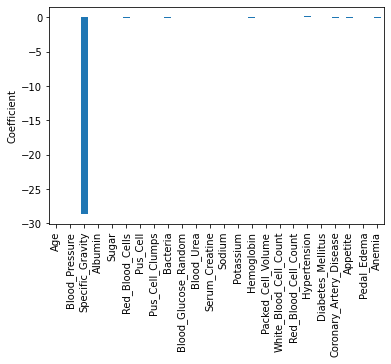

In [165]:
from sklearn import linear_model
data = df.drop(columns = ['Classif','Id'])
y = df["Classif"]
x = data
lr = linear_model.LinearRegression()
lr.fit(x, y)
coef=pd.Series(lr.coef_, index=data.columns)
coef.plot(kind='bar'); plt.ylabel('Coefficient'); plt.title
#Specific Gravity is our winner
#It is indeed a major indicator of kidney function.
#It is dominating this linear regression
#There were only 5 unique values in specific gravity in the original dataset I wonder if the lack
#of variation is causing this.  Let's drop it and see if we can have a balance of indicators.

from sklearn.metrics import r2_score as r2
pred = lr.predict(x)
r2(y, pred)

In [166]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import shap  

train_x, val_x, train_y, val_y = train_test_split(x, y, random_state=1)
my_model = RandomForestClassifier(random_state=0).fit(train_x, train_y)
row_to_show = 1
data_for_prediction = val_x.iloc[row_to_show]  # use 1 row of data here. Could use multiple rows if desired
data_for_prediction_array = data_for_prediction.values.reshape(1, -1)
my_model.predict_proba(data_for_prediction_array)



explainer = shap.TreeExplainer(my_model)
shap_values = explainer.shap_values(data_for_prediction)


ModuleNotFoundError: No module named 'shap'

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], data_for_prediction)
#Diabetes is the number one cause of chronic kidney disease (CKD) and our model agrees.

In [ ]:

explainer = shap.TreeExplainer(my_model)
.
shap_values = explainer.shap_values(val_x)

shap.summary_plot(shap_values[1], val_x)

In [ ]:
#We can drop the specific gravity of the blood and break down other factors in the linear
#regression
data = data.drop(columns = ['Specific_Gravity'])
y = df["Classif"]
x = data
lr = linear_model.LinearRegression()
lr.fit(x, y)
coef=pd.Series(lr.coef_, index=data.columns)
coef.plot(kind='bar'); plt.ylabel('Coefficient');

#Healthy kidneys make a hormone called erythropoietin (EPO). 
#EPO sends a signal to the body to make more red blood cells. 
#If your kidneys are not working as well as they should, they can’t make enough EPO.
#Without enough EPO, your body doesn’t know to make enough red blood cells. 
#These will correlate with anemia and hemoglobin which are byproducts of red blood cells.

In [ ]:

data = data.drop(columns = ['Anemia','Hemoglobin', 'Red_Blood_Cell_Count', 'Red_Blood_Cells'])

y = df["Classif"]
x = data
lr = linear_model.LinearRegression()
lr.fit(x, y)
coef=pd.Series(lr.coef_, index=data.columns)
coef.plot(kind='bar'); plt.ylabel('Coefficient');
#Diabetes is the number one cause of chronic kidney disease (CKD)
#The indicators before this were consequence of ckd but this is the biggest cuase.


In [ ]:
data = data.drop(columns = ['Diabetes_Mellitus'])
y = df["Classif"]
x = data
lr = linear_model.LinearRegression()
lr.fit(x, y)
coef=pd.Series(lr.coef_, index=data.columns)
coef.plot(kind='bar'); plt.ylabel('Coefficient');
#pus indicates infection this will correlate with white blood cells.
#After this we have Coronary artery disease which would be cause by the kidney not filtering plaque
#out of the blood.  THis would couse hypertension, high blood pressure, and pedal edema.
#The last two big indicatores are pus and bateria which indicate infection.  
# Having kidney disease and kidney failure can weaken your immune system, 
#making it easier for infections to take hold and this seems have relatively high correlation to ckd.